# Is your flight going to be delayed?

## A look inside of a plane to see how long you'll be outside

By Brennan Donnell, Mitch Friend, Alicia Hernandez

## Libraries

In [1]:
import time
import re
import os
import numpy as np
import pandas as pd
import requests
from IPython.display import Image
from bs4 import BeautifulSoup
from naiveBayesBasic import *

# this comes in later
d = Classifier('2BOS_CHAR2.txt', "attr\tattr\tattr\tattr\tclass")

## Step 1 – Scraping

* Use BeautifulSoup4 to scrape relevant information from the Federal Aviation Administration (FAA)
  + Used Q4 2015 tail numbers

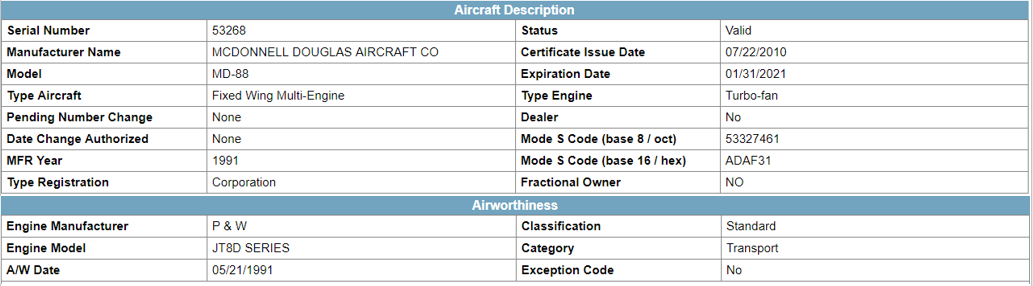

In [2]:
Image(filename='Capcddture.PNG')

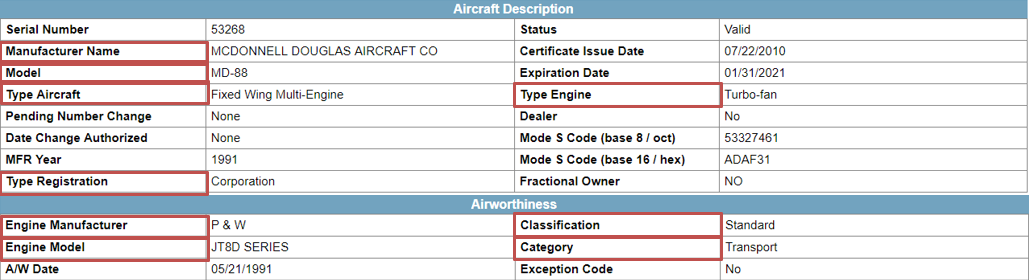

In [3]:
Image(filename='CAP.png')

Note: The scraping code is included in this notebook, but not visible in the presentation due to formatting. A full demonstration is possible, but it takes a while. Thus we have a smaller sample of tail numbers. 

In [4]:
def get_tnum_info(l):
    """
    Pass in a list of tail numbers as strings, 
    Return a dataframe.
    """
    tnum = []
    desc1 = []
    desc2 = []
    desc3 = []
    desc33 = []
    desc4 = []
    desc5 = []
    desc6 = []
    desc7 = []
    desc8 = []
    desc9 = []
    desc10 = []
    desc11 = []
    desc12 = []
    desc13 = []
    desc14 = []
    eng1 = []
    eng2 = []
    eng3 = []
    eng4 = []
    eng5 = []
    eng6 = []
    for itm in l:
        print(itm)
        try:
            response = requests.get(
                "https://registry.faa.gov/aircraftinquiry/NNum_Results.aspx?NNumbertxt="
                + itm)
            bsObj = BeautifulSoup(response.text, "lxml")
            pg = bsObj.findAll('div', {'id': 'content'})
            air_desc_table_bs4 = pg[0].findAll('table', {'class': 'Boxed'})
            
            snum = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbSerialNo"})[0].getText()
            status = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbStatus"})[0].getText()
            mfr_name = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbMfrName"})[0].getText()
            cert_date = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbCertDate"})[0].getText()
            model = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label7"})[0].getText()
            exp_date = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label9"})[0].getText()
            type_aircraft = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label11"})[0].getText()
            type_eng = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbTypeEng"})[0].getText()
            pend_num_change = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label13"})[0].getText()
            dealer = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbDealer"})[0].getText()
            date_change_auth = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label15"})[0].getText()
            mode_s_8 = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbModeSCode"})[0].getText()
            mfr_year = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label17"})[0].getText()
            reg_type = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbTypeReg"})[0].getText()
            frac_own = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbFacOwner"})[0].getText()

            desc1.append(snum)
            desc2.append(status)
            desc3.append(cert_date)
            desc33.append(mfr_name)
            desc4.append(model)
            desc5.append(exp_date)
            desc6.append(type_aircraft)
            desc7.append(type_eng)
            desc8.append(pend_num_change)
            desc9.append(dealer)
            desc10.append(date_change_auth)
            desc11.append(mode_s_8)
            desc12.append(mfr_year)
            desc13.append(reg_type)
            desc14.append(frac_own)

            eng_desc_table_bs4 = pg[0].findAll('table', {'class': 'Boxed'})

            eng_mfg = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbEngMfr"})[0].getText()
            eng_class = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbClassification"})[0].getText()
            eng_mod = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbEngModel"})[0].getText()
            eng_cat = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbCategory1"})[0].getText()
            aw_date = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbAWDate"})[0].getText()
            ex_code = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_Label26"})[0].getText()

            eng1.append(eng_mfg)
            eng2.append(eng_class)
            eng3.append(eng_mod)
            eng4.append(eng_cat)
            eng5.append(aw_date)
            eng6.append(ex_code)
            tnum.append(itm)
            print('next')
        except:
            print('not valid')
#             tnum = tnum.remove(itm)
            
    print('done with tailnums')
#     print(len(tnum), len(desc1))
#     print(desc1)
    planeDict = {
        "Tail Number": tnum,
        "Serial Number": desc1,
        "Manufacturer name": desc33,
        "Model": desc4,
        "Type Aircraft": desc6,
        "Pending Number Change": desc8,
        "Date Change Authorized": desc10,
        "MFR Year": desc12,
        "Type Registration": desc13,
        "Status": desc2,
        "Certificate Issue Date": desc3,
        "Expiration Date": desc5,
        "Type Engine": desc7,
        "Dealer": desc9,
        "Mode S Code (base 8)": desc11,
        "Fractional Owner": desc14,
        "Engine Manufacturer": eng1,
        "Engine Model": eng3,
        "A/W Date": eng5,
        "Airworthiness Classification": eng2,
        "Airworthiness Category": eng4,
        "Exception Code": eng6
    }
    return (pd.DataFrame(planeDict))

In [5]:
demo_tails = get_tnum_info(['7819A', 'N101DA', 'N001AA','N102DA'])
demo_tails.head()

7819A
next
N101DA
next
N001AA
not valid
N102DA
next
done with tailnums


,Tail Number,Serial Number,Manufacturer name,Model,Type Aircraft,Pending Number Change,Date Change Authorized,MFR Year,Type Registration,Status,...,Type Engine,Dealer,Mode S Code (base 8),Fractional Owner,Engine Manufacturer,Engine Model,A/W Date,Airworthiness Classification,Airworthiness Category,Exception Code
0,7819A,30649,BOEING,737-7Q8,Fixed Wing Multi-Engine,None,None,2002,Corporation,Valid,...,Turbo-fan,No,52513721,NO,CFM INTL,CFM56-7B24,07/08/2015,Standard,Transport,Yes
1,N101DA,42.125,DIAMOND AIRCRAFT IND GMBH,DA 42,Fixed Wing Multi-Engine,None,None,2006,Corporation,Valid,...,Reciprocating,No,50004267,NO,THIELERT,TAE-125-01,05/08/2006,Standard,Normal,No
2,N102DA,22214,BOEING,767-232,Fixed Wing Multi-Engine,None,None,1982,Corporation,Valid,...,Turbo-fan,No,50006156,NO,GE,CF6-80 SERIES,09/01/1982,Experimental,Exhibition,No


## Step 2 – Data Cleaning

* What are the typical planes that people buy commercial tickets for? 

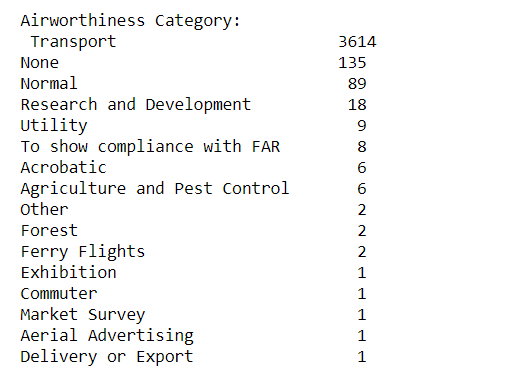

In [6]:
Image(filename='category.PNG')

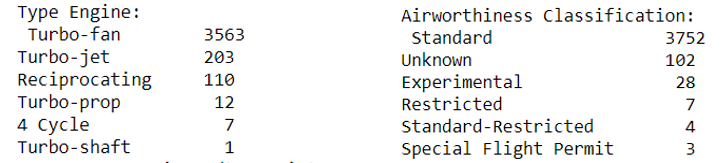

In [7]:
Image(filename='sample.PNG')

## Step 2  – Data Cleaning

Flights from Boston, MA to Charlotte, NC. 

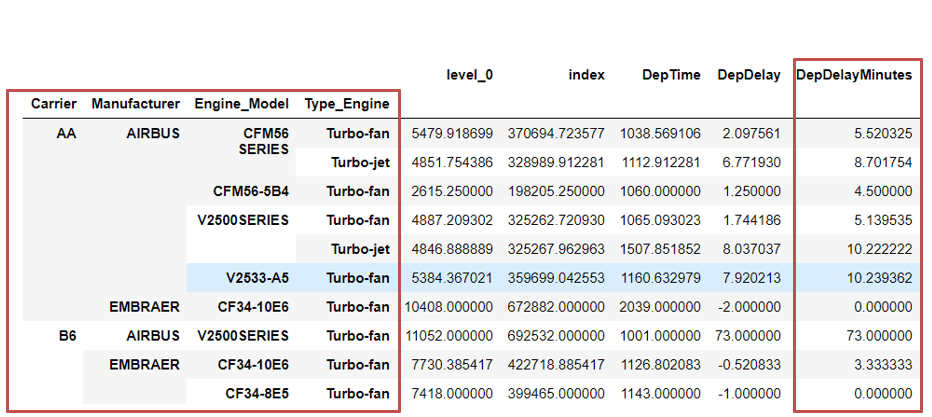

In [8]:
Image(filename='GrpBY.PNG')

## Step 3 – Classifying

This was our final table that we passed into the Naive Bayes classifier

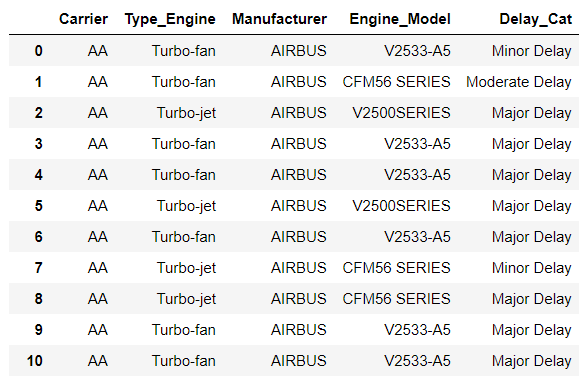

In [9]:
Image(filename='Finalfinalfinalfinalfinal.PNG')

## Step 3 – Classifying

Before looking at the classification, what are the prior and conditional probabilities of the table?

In [10]:
d.prior

{'Delay_Cat': 0.006024096385542169,
 'Minor Delay': 0.27710843373493976,
 'Moderate Delay': 0.1686746987951807,
 'Major Delay': 0.5481927710843374}

In [11]:
d.conditional

{'Delay_Cat': {1: {'Carrier': 1.0},
  2: {'Type_Engine': 1.0},
  3: {'Manufacturer': 1.0},
  4: {'Engine_Model': 1.0}},
 'Minor Delay': {1: {'AA': 0.9347826086956522, 'B6': 0.06521739130434782},
  2: {'Turbo-fan': 0.8260869565217391, 'Turbo-jet': 0.17391304347826086},
  3: {'AIRBUS': 0.9347826086956522, 'EMBRAER': 0.06521739130434782},
  4: {'V2533-A5': 0.5,
   'CFM56 SERIES': 0.30434782608695654,
   'V2500SERIES': 0.13043478260869565,
   'CF34-10E6': 0.06521739130434782}},
 'Moderate Delay': {1: {'AA': 0.9285714285714286, 'B6': 0.07142857142857142},
  2: {'Turbo-fan': 0.6785714285714286, 'Turbo-jet': 0.32142857142857145},
  3: {'AIRBUS': 0.9285714285714286, 'EMBRAER': 0.07142857142857142},
  4: {'CFM56 SERIES': 0.5,
   'V2533-A5': 0.2857142857142857,
   'V2500SERIES': 0.14285714285714285,
   'CF34-10E6': 0.07142857142857142}},
 'Major Delay': {1: {'AA': 0.8571428571428571, 'B6': 0.14285714285714285},
  2: {'Turbo-jet': 0.21978021978021978, 'Turbo-fan': 0.7802197802197802},
  3: {'AIRB

## Step 3 – Classifying

Based on the metrics of your flight, if you were to experience a delay what class of delay would it be? 

In [12]:
d.classify(['AA','Turbo-jet','AIRBUS','V2533-A5'])

'Major Delay'

## THANK YOU

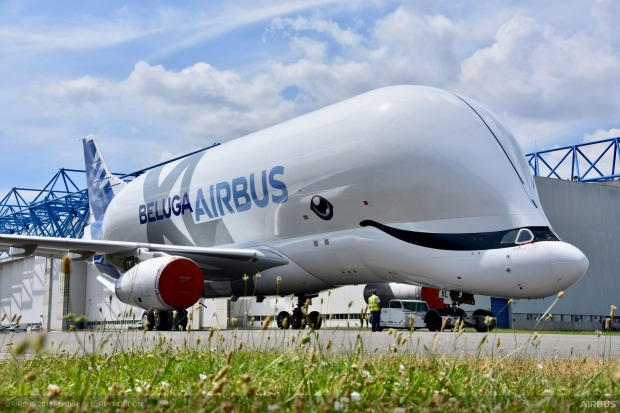

In [13]:
Image(filename='airbus_beluga.jpg')